# Job characteristics Overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read logs

In [3]:
job_chars = pd.read_parquet('data/job_chars.parquet')

In [4]:
job_chars

,Batch_class,Submission_date,Waited,Start_date,Duration,Nodes,CPU,Memory,delta_CPU,delta_Memory
index,,,,,,,,,,
000030ecd19c9c04,feque,2020-02-18 11:14:38+01:00,29.916667,2020-02-18 11:44:33+01:00,1.450000,1.0,0.168851,0.31349,0.000000,0.000000
00020fcd04947084,clexpres,2020-05-30 11:50:05+02:00,5.383333,2020-05-30 11:55:28+02:00,4.700000,2.0,31.315993,2.02000,0.000000,0.000000
0002286e1d7e428d,clmedium,NaT,NaN,2020-09-28 07:55:47+02:00,60.716667,1.0,0.989072,0.04895,0.502306,0.005687
00024ec1bf68e413,clfo2,NaT,NaN,2020-06-29 01:05:19+02:00,0.116667,1.0,0.000000,0.00000,0.000000,0.000000
00027e89035bec8d,clmedium,2020-03-25 21:22:02+01:00,38.783333,2020-03-25 22:00:49+01:00,1.283333,1.0,21.721169,131.76000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
fffbfaccf8c9fbf4,clexpres,NaT,NaN,2020-03-27 15:05:44+01:00,5.033333,1.0,0.190265,0.11484,0.000000,0.000000
fffd086716a4d46c,cllong,NaT,NaN,2020-09-14 00:40:27+02:00,143.616667,1.0,0.994714,0.46693,0.025502,0.000300
ffff38341e8c6b3b,clmedium,2020-08-13 22:35:57+02:00,401.333333,2020-08-14 05:17:17+02:00,621.766667,8.0,31.858035,5.24000,0.662259,0.550000


### Jobs with undetected processing time

In [5]:
undetected_processing_time_jobs = job_chars['Duration'].isna()
print(undetected_processing_time_jobs.sum()/job_chars.shape[0]*100, '%')

32.589048378522065 %


### Jobs both queued and processed

In [6]:
queued_and_processed_jobs = job_chars['Waited'].notna() & job_chars['Duration'].notna()
print(queued_and_processed_jobs.sum()/job_chars.shape[0]*100, '%')

34.20378172931197 %


### Jobs with undetected queue times

In [7]:
undetected_waiting_time_jobs = job_chars['Waited'].isna()
print(undetected_waiting_time_jobs.sum()/job_chars.shape[0]*100, '%')

33.207169892165965 %


### Category integrity check

In [8]:
all_jobs = undetected_processing_time_jobs | queued_and_processed_jobs | undetected_waiting_time_jobs

In [9]:
print(all_jobs.sum()/job_chars.shape[0]*100, '%')

100.0 %


### Batch class

In [10]:
def target_quantity(job_logs_column, boolean_mask):
    if boolean_mask is None:
        return job_logs_column.value_counts()/job_logs_column.size
    else:
        return job_logs_column[boolean_mask].value_counts()/boolean_mask.sum()

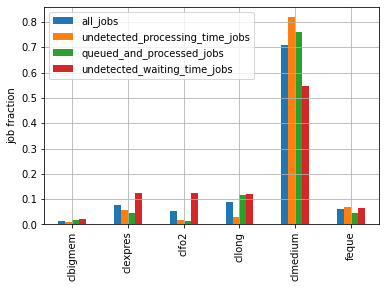

In [11]:
target = pd.DataFrame({
    'all_jobs': target_quantity(job_chars['Batch_class'], None),
    'undetected_processing_time_jobs': target_quantity(job_chars['Batch_class'], undetected_processing_time_jobs),
    'queued_and_processed_jobs': target_quantity(job_chars['Batch_class'], queued_and_processed_jobs),
    'undetected_waiting_time_jobs': target_quantity(job_chars['Batch_class'], undetected_waiting_time_jobs),
             })
target.plot.bar()
plt.ylabel('job fraction'); plt.grid()

In [12]:
100*target['all_jobs']

clbigmem     1.511581
clexpres     7.511089
clfo2        5.250462
cllong       8.956811
clmedium    70.779277
feque        5.990780
Name: all_jobs, dtype: float64

### Submission hour and weekday
For the jobs with undetected waiting time, assume the start date as submission date.

In [13]:
temp_job_chars = job_chars.copy()
temp_job_chars['Submission_date'].fillna(temp_job_chars['Start_date'], inplace=True)

In [70]:
jobsum     = job_chars.set_index('Submission_date').resample('1d').count()

In [71]:
jobsum

,Batch_class,Waited,Start_date,Duration,Nodes,CPU,Memory,delta_CPU,delta_Memory
Submission_date,,,,,,,,,
2020-02-06 00:00:00+01:00,40,40,33,33,40,33,33,33,33
2020-02-07 00:00:00+01:00,917,917,439,439,917,439,439,439,439
2020-02-08 00:00:00+01:00,1053,1053,185,185,1053,185,185,185,185
2020-02-09 00:00:00+01:00,254,254,237,237,254,237,237,237,237
2020-02-10 00:00:00+01:00,158,158,105,105,158,105,105,105,105
...,...,...,...,...,...,...,...,...,...
2020-10-03 00:00:00+02:00,248,248,184,184,248,184,184,184,184
2020-10-04 00:00:00+02:00,86,86,82,82,86,82,82,82,82
2020-10-05 00:00:00+02:00,255,255,166,166,255,166,166,166,166


In [81]:

timeseries = {}
timeseries['Undetected waiting time']    = job_chars[undetected_waiting_time_jobs].set_index('Start_date').resample('1d').count()['Batch_class']
timeseries['Undetected processing time'] = job_chars[undetected_processing_time_jobs].set_index('Submission_date').resample('1d').count()['Batch_class']
timeseries['Queued and processed jobs'] = job_chars[queued_and_processed_jobs].set_index('Submission_date').resample('1d').count()['Batch_class']

timeseries_df = pd.DataFrame(timeseries)

<AxesSubplot:xlabel='Start_date', ylabel='#Jobs submitted'>

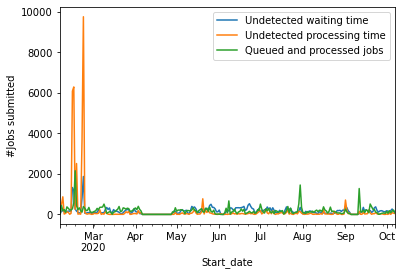

In [91]:
timeseries_df.plot(ylabel='#Jobs submitted')

In [82]:
value_sum = timeseries_df.sum(axis=1) 
timeseries['Undetected waiting time'] /= value_sum
timeseries['Undetected processing time'] /= value_sum
timeseries['Queued and processed jobs'] /= value_sum
timeseries_rel = pd.DataFrame(timeseries)*100

<AxesSubplot:xlabel='Start_date', ylabel='Job fraction %'>

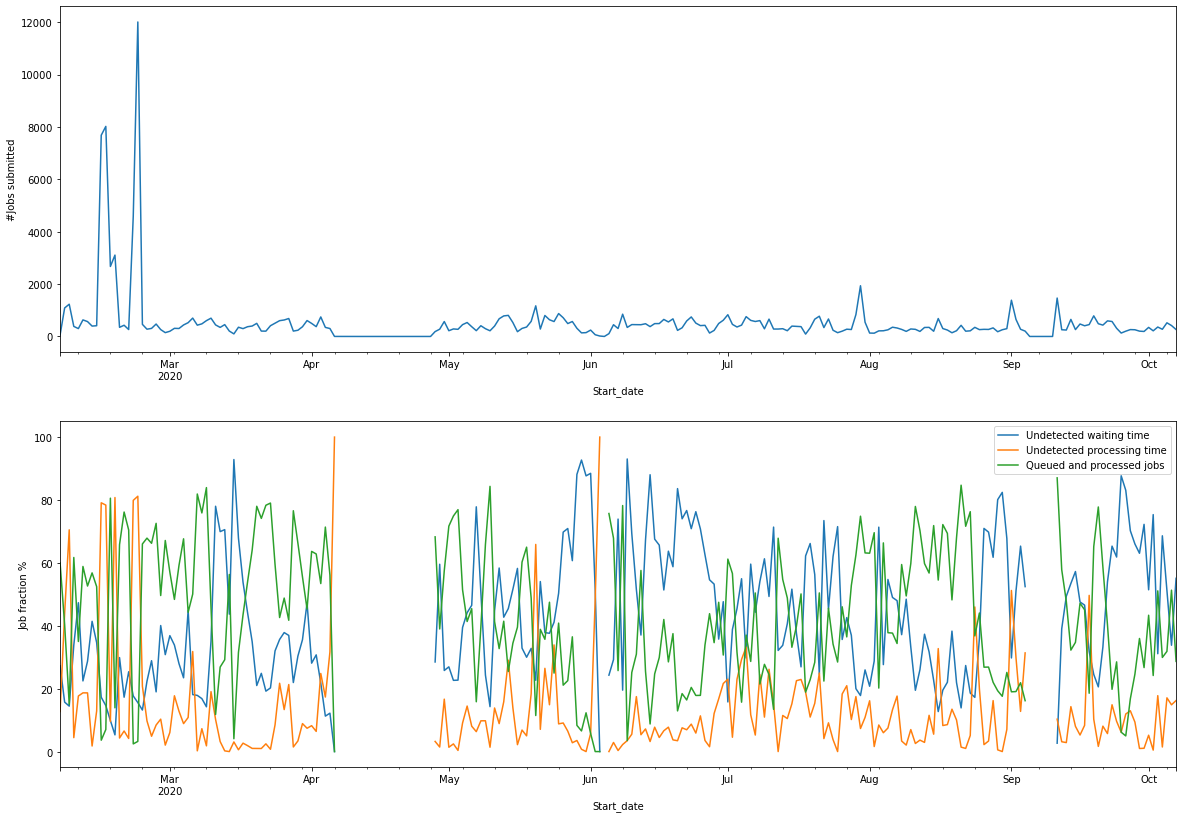

In [103]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,14))

timeseries_df.sum(axis=1).plot(ylabel='#Jobs submitted',ax=axes[0])
timeseries_rel.plot(ylabel='Job fraction %', ax=axes[1])

In [13]:
def target_quantity(job_logs_column, boolean_mask):
    if boolean_mask is None:
        return job_logs_column.dt.hour.value_counts().sort_index()/job_logs_column.size
    else:
        return job_logs_column[boolean_mask].dt.hour.value_counts().sort_index()/boolean_mask.sum()

all_jobs                           0.041667
undetected_processing_time_jobs    0.041667
queued_and_processed_jobs          0.041667
undetected_waiting_time_jobs       0.041667
dtype: float64


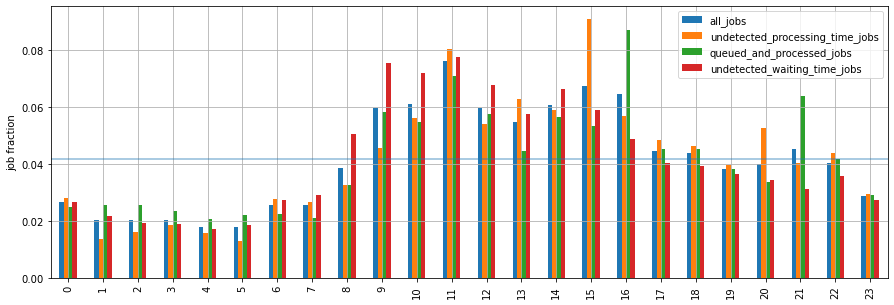

In [14]:
target = pd.DataFrame({
    'all_jobs': target_quantity(temp_job_chars['Submission_date'], None),
    'undetected_processing_time_jobs': target_quantity(temp_job_chars['Submission_date'], undetected_processing_time_jobs),
    'queued_and_processed_jobs': target_quantity(temp_job_chars['Submission_date'], queued_and_processed_jobs),
    'undetected_waiting_time_jobs': target_quantity(temp_job_chars['Submission_date'], undetected_waiting_time_jobs)
             })

print(target.mean())

ax = target.plot.bar(figsize=(15,5))
ax.axhline(y=target.mean().to_numpy()[0], color='tab:blue', alpha=0.5)

plt.ylabel('job fraction'); plt.grid()

In [15]:
def target_quantity(job_logs_column, boolean_mask):
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    if boolean_mask is None:
        return (job_logs_column.dt.day_name().value_counts()/job_logs_column.size).reindex(cats)
    else:
        return (job_logs_column[boolean_mask].dt.day_name().value_counts()/boolean_mask.sum()).reindex(cats)

all_jobs                           0.142857
undetected_processing_time_jobs    0.142857
queued_and_processed_jobs          0.142857
undetected_waiting_time_jobs       0.142857
dtype: float64


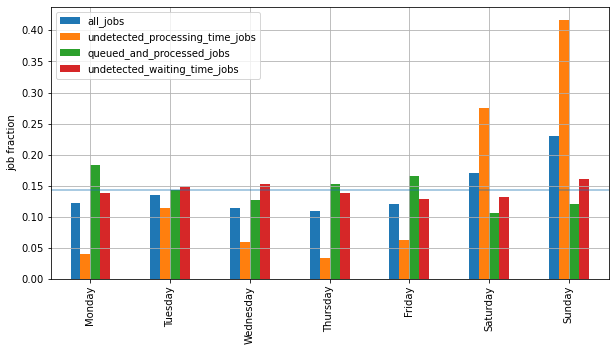

In [16]:
target = pd.DataFrame({
    'all_jobs': target_quantity(temp_job_chars['Submission_date'], None),
    'undetected_processing_time_jobs': target_quantity(temp_job_chars['Submission_date'], undetected_processing_time_jobs),
    'queued_and_processed_jobs': target_quantity(temp_job_chars['Submission_date'], queued_and_processed_jobs),
    'undetected_waiting_time_jobs': target_quantity(temp_job_chars['Submission_date'], undetected_waiting_time_jobs)
             })
ax = target.plot.bar(figsize=(10,5))
print(target.mean())
ax.axhline(y=target.mean().to_numpy()[0], color='tab:blue', alpha=0.5)

plt.ylabel('job fraction'); plt.grid()

### Start hour and weekday

In [17]:
def target_quantity(job_logs_column, boolean_mask):
    if boolean_mask is None:
        return job_logs_column.dt.hour.value_counts().sort_index()/job_logs_column.size
    else:
        return job_logs_column[boolean_mask].dt.hour.value_counts().sort_index()/boolean_mask.sum()

all_jobs                        0.041667
queued_and_processed_jobs       0.041667
undetected_waiting_time_jobs    0.041667
dtype: float64


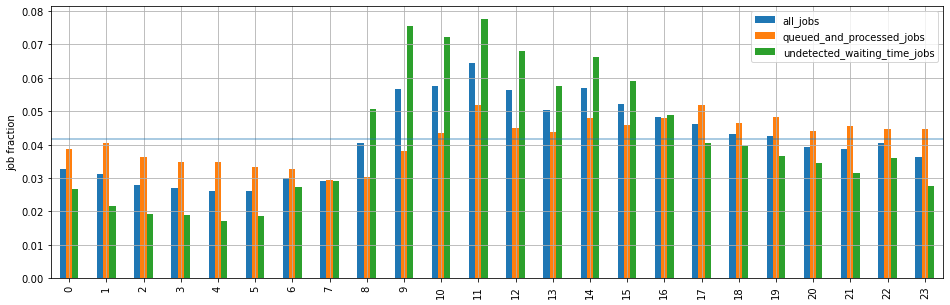

In [18]:
target = pd.DataFrame({
    'all_jobs': target_quantity(temp_job_chars['Start_date'], queued_and_processed_jobs | undetected_waiting_time_jobs),
    'queued_and_processed_jobs': target_quantity(temp_job_chars['Start_date'], queued_and_processed_jobs),
    'undetected_waiting_time_jobs': target_quantity(temp_job_chars['Start_date'], undetected_waiting_time_jobs)
             })
ax = target.plot.bar(figsize=(16,5))
print(target.mean())
ax.axhline(y=target.mean().to_numpy()[0], color='tab:blue', alpha=0.5)
plt.ylabel('job fraction'); plt.grid()

In [19]:
def target_quantity(job_logs_column, boolean_mask):
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    if boolean_mask is None:
        return (job_logs_column.dt.day_name().value_counts()/job_logs_column.size).reindex(cats)
    else:
        return (job_logs_column[boolean_mask].dt.day_name().value_counts()/boolean_mask.sum()).reindex(cats)

all_jobs                        0.096301
queued_and_processed_jobs       0.142857
undetected_waiting_time_jobs    0.142857
dtype: float64


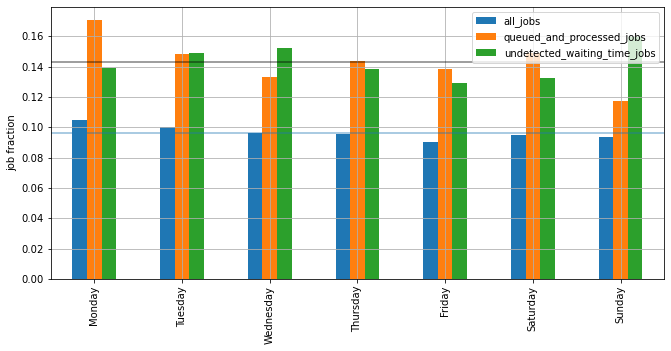

In [20]:
target = pd.DataFrame({
    'all_jobs': target_quantity(temp_job_chars['Start_date'], None),
    'queued_and_processed_jobs': target_quantity(temp_job_chars['Start_date'], queued_and_processed_jobs),
    'undetected_waiting_time_jobs': target_quantity(temp_job_chars['Start_date'], undetected_waiting_time_jobs)
             })
ax = target.plot.bar(figsize=(11,5))
print(target.mean())
ax.axhline(y=target.mean().to_numpy().min(), color='tab:blue', alpha=0.5)
ax.axhline(y=target.mean().to_numpy().max(), color='k', alpha=0.5)
plt.ylabel('job fraction'); plt.grid()

In [21]:
!conda list --explicit

# This file may be used to create an environment using:
# $ conda create --name <env> --file <this file>
# platform: linux-64
@EXPLICIT
https://conda.anaconda.org/conda-forge/linux-64/git-lfs-2.11.0-0.tar.bz2
https://conda.anaconda.org/conda-forge/noarch/nomkl-1.0-h5ca1d4c_0.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/_libgcc_mutex-0.1-conda_forge.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/ca-certificates-2020.6.20-hecda079_0.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/ld_impl_linux-64-2.35-h769bd43_9.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/libgfortran5-9.3.0-he4bcb1c_17.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/libstdcxx-ng-9.3.0-h2ae2ef3_17.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/pandoc-2.11.0.4-hd18ef5c_0.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/libgfortran-ng-9.3.0-he4bcb1c_17.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/libgomp-9.3.0-h5dbcf3e_17.tar.bz2
https://conda.anacon